In [1]:
%load_ext autoreload
%autoreload 2
    
import random
import networkx as nx
import os
import matplotlib.pyplot as plt

from GeneticAlgorithm import GeneticAlgorithm

Successfully loaded graph with 11 nodes.


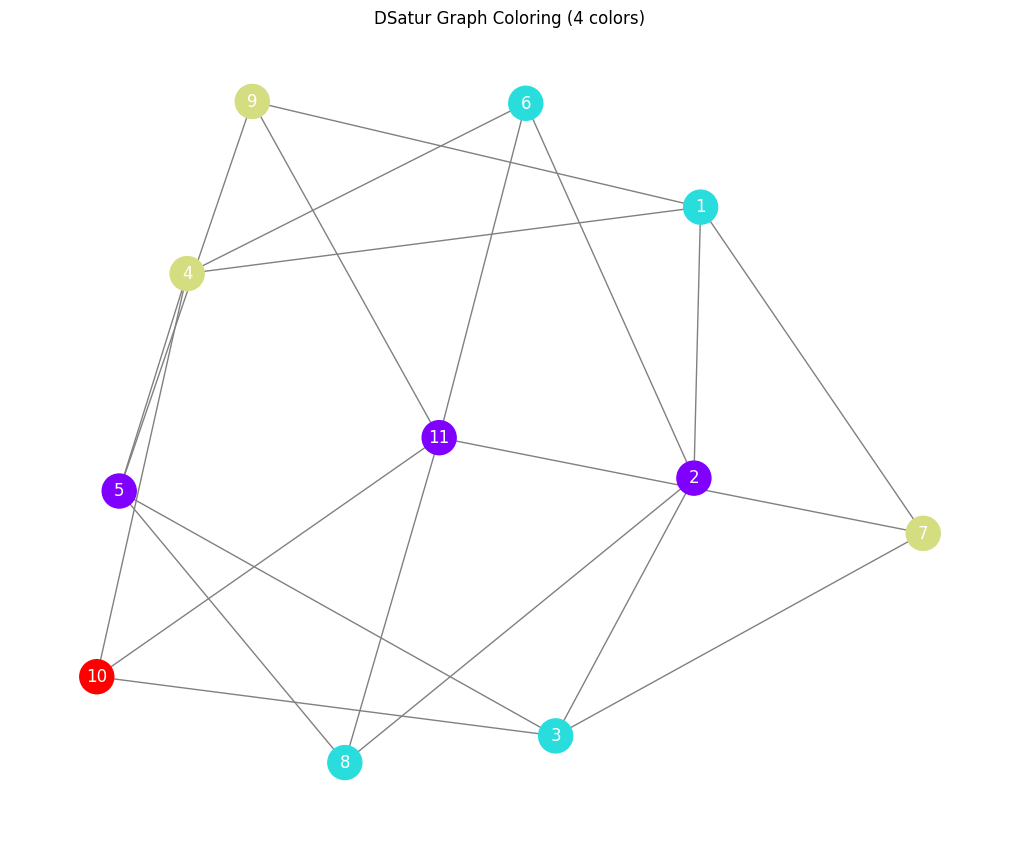

DSatur finished. Chromatic number found: 4
Node 11 -> Color 0
Node 6 -> Color 1
Node 2 -> Color 0
Node 1 -> Color 1
Node 7 -> Color 2


In [27]:
def read_col_file(file_path):
    """
    Parses a DIMACS .col file and returns a NetworkX graph.
    """
    G = nx.Graph()
    
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File {file_path} not found.")

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('c'):
                continue
            
            parts = line.split()
            if parts[0] == 'p':
                # p edge [num_nodes] [num_edges]
                num_nodes = int(parts[2])
                G.add_nodes_from(range(1, num_nodes + 1))
            elif parts[0] == 'e':
                # e [node1] [node2]
                u, v = int(parts[1]), int(parts[2])
                G.add_edge(u, v)
                
    return G

def dsatur_coloring(G):
    """
    DSatur algorithm implementation.
    """
    colors = {}
    degrees = dict(G.degree())
    saturation_degrees = {node: 0 for node in G.nodes()}
    neighbor_colors = {node: set() for node in G.nodes()}
    uncolored_nodes = list(G.nodes())

    while uncolored_nodes:
        # Pick node with max saturation, then max degree
        best_node = max(
            uncolored_nodes, 
            key=lambda n: (saturation_degrees[n], degrees[n])
        )

        # Find lowest available color
        forbidden = neighbor_colors[best_node]
        color = 0
        while color in forbidden:
            color += 1
        
        colors[best_node] = color
        uncolored_nodes.remove(best_node)

        # Update neighbors
        for neighbor in G.neighbors(best_node):
            if neighbor not in colors:
                if color not in neighbor_colors[neighbor]:
                    neighbor_colors[neighbor].add(color)
                    saturation_degrees[neighbor] = len(neighbor_colors[neighbor])
    visualize_coloring(G, colors)
    return colors

def visualize_coloring(G, coloring):
    """
    Visualizes the graph with nodes colored based on the DSatur result.
    """
    # Create a layout (spring_layout is generally best for general graphs)
    pos = nx.spring_layout(G, seed=42) 
    
    # Map the coloring dictionary into a list ordered by G.nodes()
    # This ensures colors match the correct nodes during drawing
    node_colors = [coloring[node] for node in G.nodes()]
    
    plt.figure(figsize=(10, 8))
    
    # Draw the graph
    nx.draw(
        G, pos, 
        node_color=node_colors, 
        with_labels=True, 
        node_size=600, 
        cmap=plt.cm.rainbow,  # Uses a rainbow colormap for distinct colors
        font_color="white",
        edge_color="gray"
    )
    
    plt.title(f"DSatur Graph Coloring ({max(coloring.values())+1} colors)")
    plt.show()

# Example integration:
# coloring = dsatur_coloring(G)
# visualize_coloring(G, coloring)

# --- Main Execution ---
if __name__ == "__main__":
    # Replace 'my_graph.col' with your actual filename
    file_name = "myciel3.col" 
    
    try:
        graph = read_col_file(file_name)
        print(f"Successfully loaded graph with {graph.number_of_nodes()} nodes.")
        
        coloring_result = dsatur_coloring(graph)
        unique_colors = set(coloring_result.values())
        
        print(f"DSatur finished. Chromatic number found: {len(unique_colors)}")
        # Example: Print first 5 assignments
        for node in list(coloring_result.keys())[:5]:
            print(f"Node {node} -> Color {coloring_result[node]}")
            
    except Exception as e:
        print(f"Error: {e}")

Valid coloring found at generation 0
Gen 0: best conflicts = 0


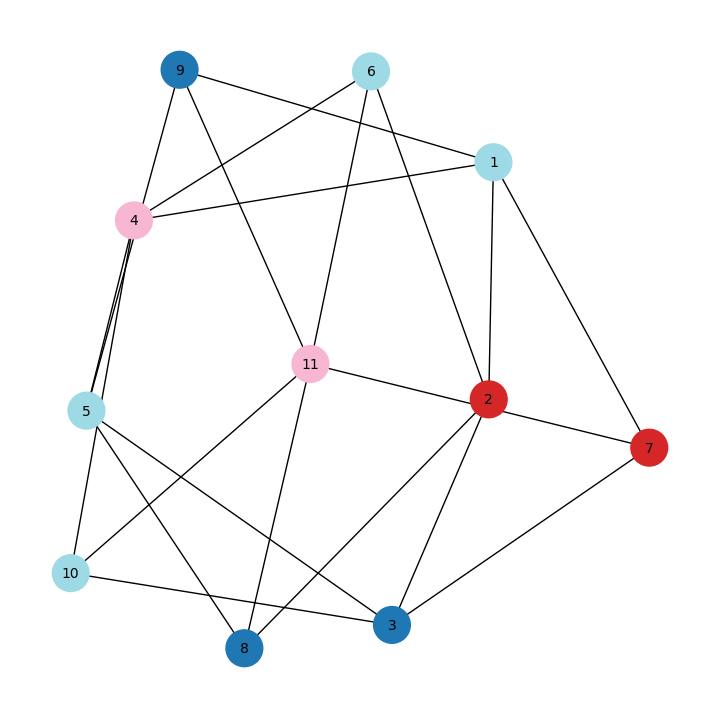

Best coloring found:
[3, 1, 0, 2, 3, 3, 1, 0, 0, 3, 2]
Conflicts: 0
Number of Colors {0, 1, 2, 3}


In [36]:
FILENAME = "myciel3.col"
NUMBER_OF_COLORS = 4
POPULATION_SIZE = 100
GENERATIONS = 1000
MUTATION_RATE = 0.06
ELITISM_SIZE = 3
TOURNAMENT_SIZE = 3

first_problem = GeneticAlgorithm(
    FILENAME, 
    NUMBER_OF_COLORS,
    POPULATION_SIZE,
    GENERATIONS,
    MUTATION_RATE,
    ELITISM_SIZE,
    TOURNAMENT_SIZE,
)
first_problem.genetic_algorithm()

Gen 0: best conflicts = 21
Gen 50: best conflicts = 1
Valid coloring found at generation 52
Gen 52: best conflicts = 0


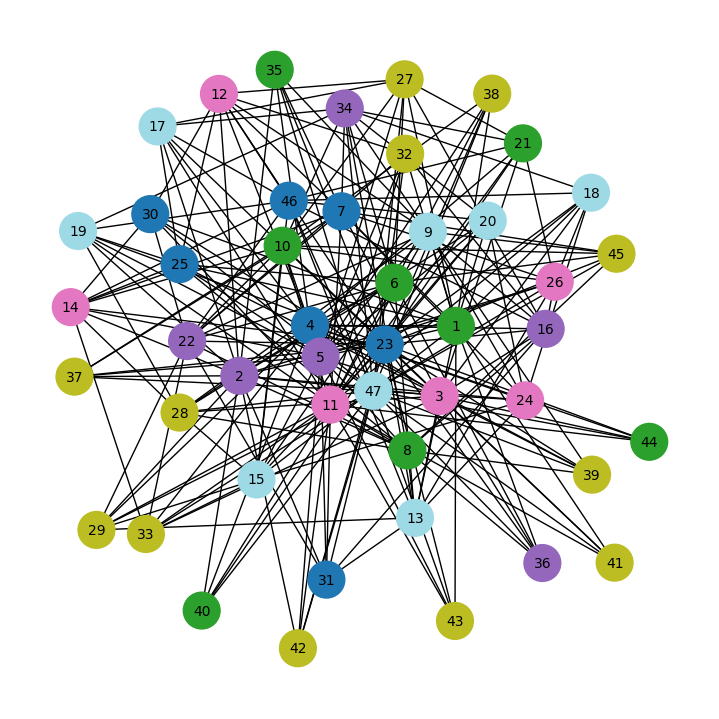

Best coloring found:
[1, 2, 3, 0, 2, 1, 0, 1, 5, 1, 3, 3, 5, 3, 5, 2, 5, 5, 5, 5, 1, 2, 0, 3, 0, 3, 4, 4, 4, 0, 0, 4, 4, 2, 1, 2, 4, 4, 4, 1, 4, 4, 4, 1, 4, 0, 5]
Conflicts: 0
Number of Colors {0, 1, 2, 3, 4, 5}


In [37]:
FILENAME = "myciel5.col"
NUMBER_OF_COLORS = 6
POPULATION_SIZE = 100
GENERATIONS = 1000
MUTATION_RATE = 0.06
ELITISM_SIZE = 3
TOURNAMENT_SIZE = 3

first_problem = GeneticAlgorithm(
    FILENAME, 
    NUMBER_OF_COLORS,
    POPULATION_SIZE,
    GENERATIONS,
    MUTATION_RATE,
    ELITISM_SIZE,
    TOURNAMENT_SIZE,
)
first_problem.genetic_algorithm()

In [3]:
FILENAME = "le450_5d.col"
NUMBER_OF_COLORS = 5
POPULATION_SIZE = 200
GENERATIONS = 3000
MUTATION_RATE = 0.08
ELITISM_SIZE = 4
TOURNAMENT_SIZE = 4

first_problem = GeneticAlgorithm(
    FILENAME, 
    NUMBER_OF_COLORS,
    POPULATION_SIZE,
    GENERATIONS,
    MUTATION_RATE,
    ELITISM_SIZE,
    TOURNAMENT_SIZE,
)
first_problem.genetic_algorithm()

Gen 0: best conflicts = 1837
Gen 50: best conflicts = 1671
Gen 100: best conflicts = 1612
Gen 150: best conflicts = 1612
Gen 200: best conflicts = 1612
Gen 250: best conflicts = 1586
Gen 300: best conflicts = 1584
Gen 350: best conflicts = 1584
Gen 400: best conflicts = 1584
Gen 450: best conflicts = 1584
Gen 500: best conflicts = 1584
Gen 550: best conflicts = 1574
Gen 600: best conflicts = 1568
Gen 650: best conflicts = 1552
Gen 700: best conflicts = 1545
Gen 750: best conflicts = 1524
Gen 800: best conflicts = 1515
Gen 850: best conflicts = 1515
Gen 900: best conflicts = 1515
Gen 950: best conflicts = 1515
Gen 1000: best conflicts = 1515
Gen 1050: best conflicts = 1515
Gen 1100: best conflicts = 1512
Gen 1150: best conflicts = 1512
Gen 1200: best conflicts = 1503
Gen 1250: best conflicts = 1477
Gen 1300: best conflicts = 1477
Gen 1350: best conflicts = 1477
Gen 1400: best conflicts = 1477
Gen 1450: best conflicts = 1464
Gen 1500: best conflicts = 1464
Gen 1550: best conflicts = 1464